In [1]:
import numpy as np
from matplotlib import pyplot as plt
def generate_triangular_lattice(H=500, W=500, spacing=30, sigma=2.5, amplitude=1.0, center=None):
    """
    Generate a triangular lattice pattern as a 2D numpy array.

    Parameters
    ----------
    H, W : int
        Height and width of the output array.
    spacing : float
        Distance between nearest lattice points (in pixels).
    sigma : float
        Gaussian peak width (standard deviation in pixels).
    amplitude : float
        Peak height.
    center : tuple(float, float) or None
        Center of the lattice in (x, y) pixel coordinates.
        Can be fractional (subpixel precision). If None, defaults to image center.

    Returns
    -------
    data : np.ndarray
        2D numpy array of shape (H, W) with normalized values in range [0, 1].
    """
    # Lattice basis vectors (triangular symmetry)
    a1 = np.array([1.0, 0.0])
    a2 = np.array([0.5, np.sqrt(3) / 2])

    # Coordinate grid
    y = np.arange(H)
    x = np.arange(W)
    X, Y = np.meshgrid(x, y)

    # Set center
    if center is None:
        center = (W / 2, H / 2)
    center = np.array(center, dtype=float)  # allow subpixel

    # Output array
    data = np.zeros((H, W), dtype=float)

    # Number of lattice points in each direction
    n_i = int(W / spacing) + 6
    n_j = int(H / spacing) + 6

    # Generate Gaussian peaks
    for i in range(-n_i, n_i + 1):
        for j in range(-n_j, n_j + 1):
            pos = (i * a1 + j * a2) * spacing + center
            px, py = pos
            # Skip points too far outside image
            if px < -3*sigma or px > W + 3*sigma or py < -3*sigma or py > H + 3*sigma:
                continue
            rr = (X - px) ** 2 + (Y - py) ** 2
            data += amplitude * np.exp(-rr / (2 * sigma ** 2))

    # Normalize to 0..1
    data = (data - data.min()) / (data.max() - data.min())

    return data
    

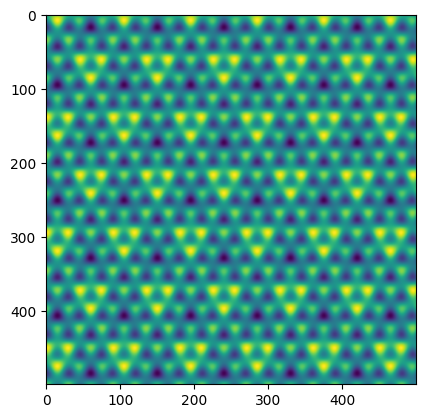

In [2]:
import numpy as np

def get_angle_vector(angle_deg):
    theta = np.radians(angle_deg)
    return np.array([np.cos(theta), np.sin(theta)])
cs = get_angle_vector


r3 = np.sqrt(3)
H=500 
W=500
spacing=30
sigma=15
posYinYangs = np.array(((0,0),
                        r3*30*cs(30)))
shifts = 15*r3*np.array((
    cs(210),
    cs(330),
    cs(90)
))*0.8


def base_lattice():
    img = np.zeros((H,W))
    img += generate_triangular_lattice(H=H, W=W, spacing=spacing, sigma=sigma, center= (spacing/r3)*cs(30))
    img -= generate_triangular_lattice(H=H, W=W, spacing=spacing, sigma=sigma, center= (spacing/r3)*cs(-30))
    return img


def cdw(center_shift = (0,0)):
    img = np.zeros((H,W))
    for iyy in range(2):
        posYinYang = posYinYangs[iyy] 
        for ishift in range(3):
            shift = shifts[ishift]
            center = posYinYang + shift * (-2*iyy+1) + center_shift #+ 30*cs(120)*i4             
            corrugation_now = generate_triangular_lattice(H=H, W=W, spacing=spacing*3, sigma=sigma,  center=center)*.5
            img += corrugation_now* (-2*iyy+1)
    return img
img = base_lattice() + (cdw(0)+ cdw(30*cs(0))+ cdw(30*cs(-60)))/2


plt.imshow(img,cmap= 'viridis',vmax=img.max(),vmin=img.min())
# plt.plot(240,240,'ro')

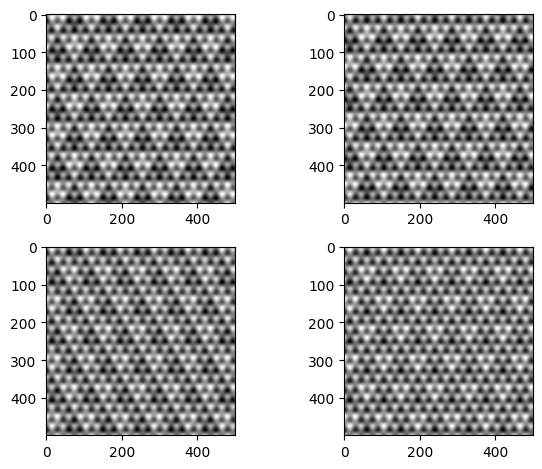

In [10]:
fig,axs = plt.subplots(2,2)
bl = base_lattice()
img1 = bl + cdw(30*cs(0))
img2 = bl + (cdw(30*cs(-60)))
img3 = bl + (cdw(30*cs(0))+ cdw(30*cs(-60)))/2
img4 = bl + (cdw(0)+ cdw(30*cs(0))+ cdw(30*cs(-60)))/3
cmap = 'gray'
axs[0,0].imshow(img1,cmap=cmap)
axs[0,1].imshow(img2,cmap=cmap)
axs[1,0].imshow(img3,cmap=cmap)
axs[1,1].imshow(img4,cmap=cmap)
plt.tight_layout()
fig.savefig('fake_stm_images.svg')

